## I. IMPORTATION DES DONNEES VIA L'API DE DATA.GOUV.FR

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
def recuperer_donnees(dataset_id, fichier_csv):
    """
    Cette fonction télécharge les données d'un fichier CSV à partir d'une URL et les charge dans un DataFrame pandas.
    
    Paramètres:
    dataset_id (str): idetifiant du fichier CSV.
    fichier_csv (str): Le nom du fichier CSV à enregistrer localement.
    
    Retourne:
    DataFrame: Un DataFrame pandas contenant les données du fichier CSV.
    """

    # URL de base pour accéder à l'API
    base_api = "https://www.data.gouv.fr/api/1/"

    # Chemin pour accéder aux enregistrements du dataset
    key_api = "datasets/r/"

    # Construction de l'URL complète
    url = f"{base_api}{key_api}{dataset_id}"


    response = requests.get(url)
    if response.status_code == 200:
        with open(fichier_csv, 'wb') as file:
            file.write(response.content)
        print("Le fichier a été téléchargé avec succès.")
        df = pd.read_csv(fichier_csv, sep = ";")
        return df
    else:
        print("La requête a échoué. Code d'état:", response.status_code)
        return None

In [50]:
#Chargement du fichier de correspondance region-departement

dataset_id = "987227fb-dcb2-429e-96af-8979f97c9c84"
fichier_csv = "departements-region.csv"

df_region_dep = recuperer_donnees(dataset_id,fichier_csv)
df_region_dep = df_region_dep.rename(columns={'num_dep': 'dep', 'region_name':'region'})
df_region_dep.head()



Le fichier a été téléchargé avec succès.


,dep,dep_name,region
0,01,Ain,Auvergne-Rhône-Alpes
1,02,Aisne,Hauts-de-France
2,03,Allier,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur


In [3]:
# Chargement du fichier des usagers

dataset_id = "68848e2a-28dd-4efc-9d5f-d512f7dbe66f"
fichier_csv = "usagers-2023.csv"

df_usagers = recuperer_donnees(dataset_id,fichier_csv)
df_usagers.head()

Le fichier a été téléchargé avec succès.


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


In [4]:
# Chargement du fichier des véhicules

dataset_id = "146a42f5-19f0-4b3e-a887-5cd8fbef057b"
fichier_csv = "vehicules-2023.csv"

df_vehicules = recuperer_donnees(dataset_id,fichier_csv)
df_vehicules.head()

Le fichier a été téléchargé avec succès.


,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [5]:
#Chargement du fichier des lieux

dataset_id = "8bef19bf-a5e4-46b3-b5f9-a145da4686bc"
fichier_csv = "lieux-2023.csv"

df_lieux = recuperer_donnees(dataset_id,fichier_csv)
df_lieux.head()

Le fichier a été téléchargé avec succès.


/tmp/ipykernel_13839/1884421158.py:28: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fichier_csv, sep = ";")


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [6]:
#Chargement du fichier des caracteristiques

dataset_id = "104dbb32-704f-4e99-a71e-43563cb604f2"
fichier_csv = "caract-2023.csv"

df_caract = recuperer_donnees(dataset_id,fichier_csv)
df_caract.head()


Le fichier a été téléchargé avec succès.


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


On ne garde que les données qui nous intéressent : 
<br> - dans le fichier df_caract : Num_Acc, mois, lum, dep, com, agg, atm,lat, long
<br> - dans df_lieux : Num_Acc, catr, voie, surf, vma
<br> - dans df_vehicules : Num_Acc, id_vehicule, num_veh, catv, motor
<br> - dans df_usagers : Num_Acc, id_usager, id_vehicule, num_veh, catu, grav, trajet, secu

<br>Puis on fusionne les fichiers en un seul dataframe.

In [52]:
df_caract = df_caract.loc[:, ['Num_Acc', 'mois', 'lum', 'dep', 'com', 'agg', 'atm', 'lat', 'long']]
df_lieux = df_lieux.loc[:,['Num_Acc', 'catr', 'voie', 'surf', 'vma']]
df_vehicules = df_vehicules.loc[:,['Num_Acc', 'id_vehicule', 'num_veh', 'catv', 'motor']]
df_usagers = df_usagers.loc[:,['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'catu', 'grav', 'trajet', 'secu1', 'secu2', 'secu3']]

df_caract = pd.merge(df_caract, df_region_dep, on = "dep", how='inner')

df = pd.merge(df_usagers, df_vehicules, on = ['Num_Acc', 'id_vehicule', 'num_veh'], how = 'inner')
df = pd.merge(df, df_lieux, on = "Num_Acc", how = 'inner')
df = pd.merge(df, df_caract, on = "Num_Acc", how = 'inner')

df.head(10)

,Num_Acc,id_usager,id_vehicule,num_veh,catu,grav,trajet,secu1,secu2,secu3,catv,motor,catr,voie,surf,vma,mois,lum,dep,com,agg,atm,lat,long,dep_name,region
0,202300000001,203 851 184,155 680 557,A01,1,4,5,2,0,-1,30,1,4,RUE DE RIVOLI,2,30,5,1,75,75101,2,2,"48,86638600","2,32347100",Paris,Île-de-France
1,202300000001,203 851 184,155 680 557,A01,1,4,5,2,0,-1,30,1,4,RUE SAINT FLORENTIN,2,30,5,1,75,75101,2,2,"48,86638600","2,32347100",Paris,Île-de-France
2,202300000002,203 851 182,155 680 556,A01,1,1,9,1,0,-1,7,1,3,120,2,50,5,5,94,94080,2,3,"48,84547782","2,42868146",Val-de-Marne,Île-de-France
3,202300000002,203 851 183,155 680 556,A01,3,3,9,0,-1,-1,7,1,3,120,2,50,5,5,94,94080,2,3,"48,84547782","2,42868146",Val-de-Marne,Île-de-France
4,202300000003,203 851 180,155 680 554,B01,1,3,0,2,6,0,2,1,3,5,2,50,5,1,94,94022,2,2,"48,76240000","2,40655000",Val-de-Marne,Île-de-France
5,202300000003,203 851 180,155 680 554,B01,1,3,0,2,6,0,2,1,3,87,2,50,5,1,94,94022,2,2,"48,76240000","2,40655000",Val-de-Marne,Île-de-France
6,202300000003,203 851 181,155 680 555,A01,1,1,0,1,0,0,7,1,3,5,2,50,5,1,94,94022,2,2,"48,76240000","2,40655000",Val-de-Marne,Île-de-France
7,202300000003,203 851 181,155 680 555,A01,1,1,0,1,0,0,7,1,3,87,2,50,5,1,94,94022,2,2,"48,76240000","2,40655000",Val-de-Marne,Île-de-France
8,202300000004,203 851 175,155 680 551,B01,2,1,1,1,0,-1,7,4,2,6,2,50,5,5,94,94078,2,3,"48,73248432","2,44687575",Val-de-Marne,Île-de-France
9,202300000004,203 851 176,155 680 551,B01,1,1,1,1,0,-1,7,4,2,6,2,50,5,5,94,94078,2,3,"48,73248432","2,44687575",Val-de-Marne,Île-de-France


In [10]:
## Chargement des données géographiques

!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
!pip install topojson
!pip install --upgrade urllib3

#Chargement de cartiflette
!pip install py7zr geopandas openpyxl tqdm s3fs
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette

  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.20
    Uninstalling urllib3-1.26.20:
      Successfully uninstalled urllib3-1.26.20
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cartiflette 0.0.2 requires urllib3<2, but you have urllib3 2.2.3 which is incompatible.
  Cloning https://github.com/inseefrlab/cartiflette to /tmp/pip-req-build-phwmcobn
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-phwmcobn
  Resolved https://github.com/inseefrlab/cartiflette to commit f6b0c5d049bd6dcae7b437bd931957371da24278
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
Using cached urllib3-1.26.20-py2.py3-none-any.whl (144 kB)


In [8]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from cartiflette import carti_download

This is an experimental version of cartiflette published on PyPi.
To use the latest stable version, you can install it directly from GitHub with the following command:
pip install git+https://github.com/inseeFrLab/cartiflette.git


In [43]:
france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

depart = carti_download(
    values=["France"],
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

france.head(10)
#depart.head(10)

,INSEE_REG,PAYS,LIBELLE_REGION,POPULATION,SOURCE,geometry
0,1,France,Guadeloupe,384239,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ..."
1,3,France,Guyane,281678,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4...."
2,2,France,Martinique,364508,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14..."
3,6,France,Mayotte,256518,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -..."
4,84,France,Auvergne-Rhône-Alpes,8042936,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6..."
5,76,France,Occitanie,5933185,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((2.06288 44.97662, 2.06244 44.9..."
6,53,France,Bretagne,3354854,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-3.97907 47.70396, -3.97953 47..."
7,75,France,Nouvelle-Aquitaine,6010289,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-0.31325 42.8494, -0.31227 42...."
8,28,France,Normandie,3325032,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((-1.924 49.66512, -1.92439 49.6..."
9,93,France,Provence-Alpes-Côte d'Azur,5081101,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((4.23021 43.46049, 4.2329 43.46..."


In [38]:
france = france.loc[france["INSEE_REG"] > 10]
france = france.loc[france["INSEE_REG"] != 94]

In [34]:
depart.loc[depart['INSEE_DEP'] == '2A', 'INSEE_DEP'] = 999
depart.loc[depart['INSEE_DEP'] == '2B', 'INSEE_DEP'] = 998

In [36]:
print(depart.dtypes)
depart['INSEE_DEP'] = depart['INSEE_DEP'].astype(float).astype(int)
depart = depart.loc[depart["INSEE_DEP"] < 971]
depart = depart.to_crs(2154)
depart.head(2)

INSEE_DEP                 int64
PAYS                     object
LIBELLE_DEPARTEMENT      object
POPULATION                int32
SOURCE                   object
geometry               geometry
dtype: object


,INSEE_DEP,PAYS,LIBELLE_DEPARTEMENT,POPULATION,SOURCE,geometry
4,43,France,Haute-Loire,227570,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"POLYGON ((770266.6 6473465.6, 770225.3 6473390..."
5,65,France,Hautes-Pyrénées,229567,IGN:EXPRESS-COG-CARTO-TERRITOIRE,"MULTIPOLYGON (((449840.3 6280811.2, 449889.1 6..."


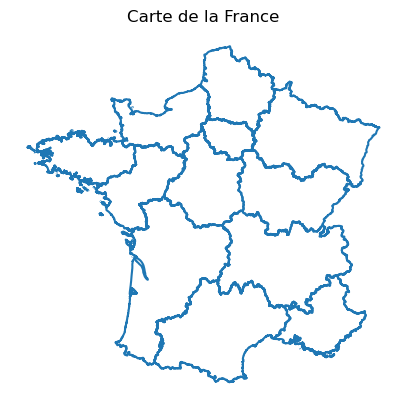

In [39]:
carte = france.boundary.plot()

# Change le crs:
#df = df.to_crs(epsg=2154)


#df.plot(ax=base, color='red')
carte.set_title('Carte de la France')
carte.set_axis_off()

## ANALYSES CARTOGRAPHIQUES

In [61]:
from shapely.geometry import Point

In [ ]:

geometry = [Point(xy) for xy in zip(df_caract['long'], df_caract['lat'])] 
points_acc = gpd.GeoDataFrame(df, geometry=geometry)
points_acc.head()

ValueError: could not convert string to float: np.str_('2,32347100')

In [60]:
points_acc = gpd.GeoDataFrame(df_caract)
points_acc.head()

,Num_Acc,mois,lum,dep,com,agg,atm,lat,long,dep_name,region
0,202300000001,5,1,75,75101,2,2,"48,86638600","2,32347100",Paris,Île-de-France
1,202300000002,5,5,94,94080,2,3,"48,84547782","2,42868146",Val-de-Marne,Île-de-France
2,202300000003,5,1,94,94022,2,2,"48,76240000","2,40655000",Val-de-Marne,Île-de-France
3,202300000004,5,5,94,94078,2,3,"48,73248432","2,44687575",Val-de-Marne,Île-de-France
4,202300000005,5,5,94,94068,2,3,"48,78581000","2,49217000",Val-de-Marne,Île-de-France


In [56]:
df1 = df.merge(france, how = 'left', on = 'region')
#base_fin.rename({'geometry_y':'geometry'}, axis="columns", inplace=True)
df1 = gpd.GeoDataFrame(df1, geometry='geometry')

In [ ]:
#Nombre d'accidents par région
nb_accidents = df.groupby('region')['Num_Acc'].count().reset_index()
base_fin = base_fin.merge(consommation_totale_par_region, on='nom_region', how='left')



# II - Premières analyses

On commence par analyser l'impact de différents paramètres sur la gravité.



In [ ]:
df["(Num_Acc, id_usager)"] = list(zip(df["Num_Acc"], df["id_usager"]))
df = df[~df[["(Num_Acc, id_usager)"]].duplicated()]  #on supprime les doublons de (Num_Acc, id_usager)
                                                    # ces doublons existent par exemple lorsqu'un accident
                                                    # se produit à une intersection entre plusieurs voies
df.head(10)

df_grav = df.groupby("grav").agg({"(Num_Acc, id_usager)": "nunique"})  #on compte toutes les victimes
                                                                        #en fonction de la gravité de leurs 
                                                                        #blessures
df_grav

,"(Num_Acc, id_usager)"
grav,
-1,118
1,53399
2,3398
3,19271
4,49603


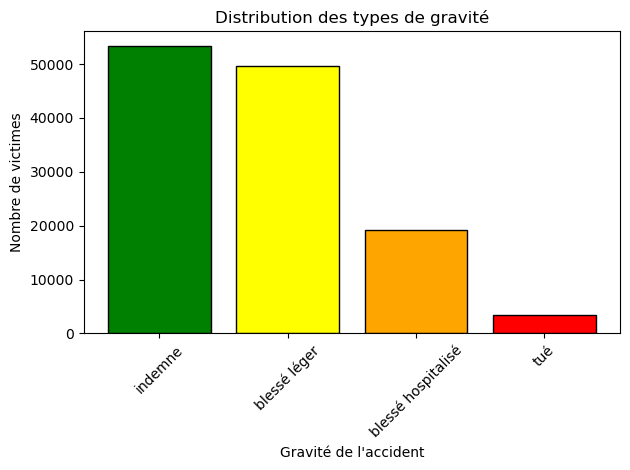

In [ ]:
hist = { "grav": ["indemne", "blessé léger", "blessé hospitalisé", "tué"],
    "nb": [53399, 49603, 19271, 3398] }

plt.bar(hist["grav"], hist["nb"], color=['green', 'yellow', 'orange', 'red'], edgecolor='black')
plt.title("Distribution des types de gravité")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Nombre de victimes")
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

On peut également regarder l'impact de la vitesse maximale autorisée sur la gravité de l'accident. Pour chaque vitesse maximale autorisée, on s'intéresse à la distribution de la gravité des accidents.

In [ ]:
df_vma_30 = df.loc[df["vma"] <= 30]
df_vma_30.head()
df_vma_50 = df.loc[(df["vma"] > 30) & (df["vma"] <= 50)]
df_vma_50.head()
df_vma_90 = df.loc[(df["vma"] > 50) & (df["vma"] <= 90)]
df_vma_90.head()
df_vma_130 = df.loc[(df["vma"] > 90) & (df["vma"] <= 130)]
df_vma_130.head()

,Num_Acc,id_usager,id_vehicule,num_veh,catu,grav,trajet,secu1,secu2,secu3,catv,motor,catr,voie,surf,vma,mois,lum,dep,com,agg,atm,lat,long,"(Num_Acc, id_usager)"
139,202300000046,203 851 069,155 680 478,B01,1,3,1,1,-1,-1,7,1,1,35,2,130,5,3,67,67205,1,2,"48,68097900","7,80884700","(202300000046, 203 851 069)"
140,202300000046,203 851 070,155 680 479,A01,1,3,1,1,-1,-1,7,1,1,35,2,130,5,3,67,67205,1,2,"48,68097900","7,80884700","(202300000046, 203 851 070)"
143,202300000048,203 851 065,155 680 474,B01,1,4,1,1,-1,-1,7,1,1,64,1,130,5,3,64,64021,1,1,"43,30865800","-0,24835900","(202300000048, 203 851 065)"
144,202300000048,203 851 066,155 680 475,A01,1,3,4,1,-1,-1,10,1,1,64,1,130,5,3,64,64021,1,1,"43,30865800","-0,24835900","(202300000048, 203 851 066)"
148,202300000050,203 851 060,155 680 469,B01,1,1,5,2,-1,-1,33,1,1,1,1,130,5,1,62,62761,1,1,"50,23268500","2,85528700","(202300000050, 203 851 060)"


In [ ]:
df_grav_30 = df_vma_30.groupby("grav").agg({"(Num_Acc, id_usager)": "nunique"})
df_grav_30["pourcentage"] = 100 * df_grav_30["(Num_Acc, id_usager)"] / df_grav_30["(Num_Acc, id_usager)"].sum()
prop_30 = df_grav_30["pourcentage"].tolist()

df_grav_50 = df_vma_50.groupby("grav").agg({"(Num_Acc, id_usager)": "nunique"})
df_grav_50["pourcentage"] = 100 * df_grav_50["(Num_Acc, id_usager)"] / df_grav_50["(Num_Acc, id_usager)"].sum()
prop_50 = df_grav_50["pourcentage"].tolist()

df_grav_90 = df_vma_90.groupby("grav").agg({"(Num_Acc, id_usager)": "nunique"})
df_grav_90["pourcentage"] = 100 * df_grav_90["(Num_Acc, id_usager)"] / df_grav_90["(Num_Acc, id_usager)"].sum()
prop_90 = df_grav_90["pourcentage"].tolist()

df_grav_130 = df_vma_130.groupby("grav").agg({"(Num_Acc, id_usager)": "nunique"})
df_grav_130["pourcentage"] = 100 * df_grav_130["(Num_Acc, id_usager)"] / df_grav_130["(Num_Acc, id_usager)"].sum()
prop_130 = df_grav_130["pourcentage"].tolist()

print(df_grav_30, "\n", df_grav_50, "\n", df_grav_90, "\n", df_grav_130)
print(prop_130)

      (Num_Acc, id_usager)  pourcentage
grav                                   
-1                      38     0.161826
 1                   10587    45.085597
 2                     360     1.533089
 3                    2482    10.569798
 4                   10015    42.649689 
       (Num_Acc, id_usager)  pourcentage
grav                                   
-1                      53     0.096357
 1                   24335    44.242237
 2                     909     1.652607
 3                    7112    12.929969
 4                   22595    41.078831 
       (Num_Acc, id_usager)  pourcentage
grav                                   
-1                      25     0.065141
 1                   14351    37.393819
 2                    1848     4.815259
 3                    8525    22.213247
 4                   13629    35.512533 
       (Num_Acc, id_usager)  pourcentage
grav                                   
-1                       2     0.022409
 1                    4126    46.2

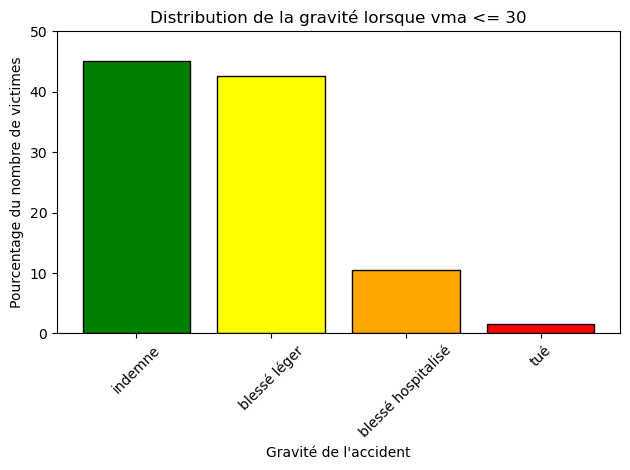

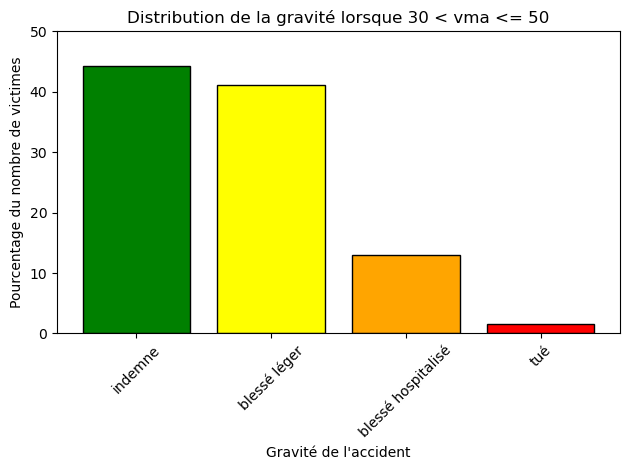

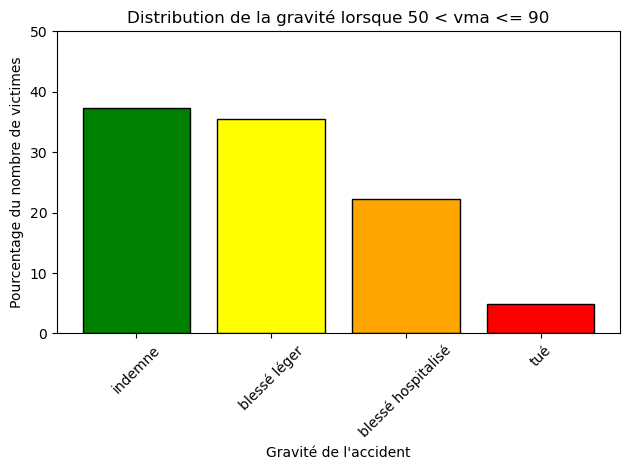

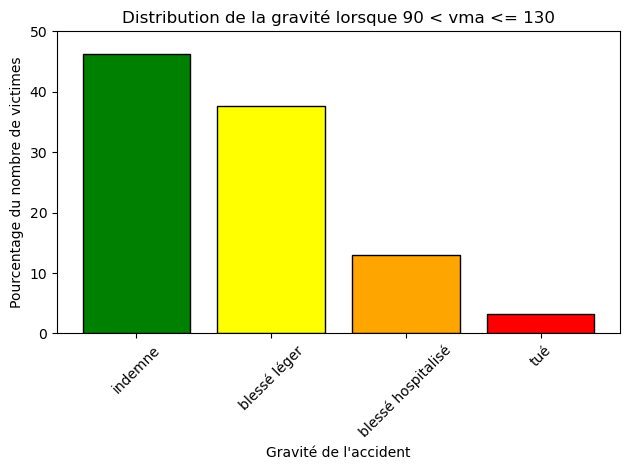

In [ ]:
hist_30 = { "grav": ["indemne", "blessé léger", "blessé hospitalisé", "tué"],
    "nb": [prop_30[1], prop_30[4], prop_30[3], prop_30[2]] }

plt.bar(hist_30["grav"], hist_30["nb"], color=['green', 'yellow', 'orange', 'red'], edgecolor='black')
plt.title("Distribution de la gravité lorsque vma <= 30")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Pourcentage du nombre de victimes")
plt.ylim(top = 50)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

hist_50 = { "grav": ["indemne", "blessé léger", "blessé hospitalisé", "tué"],
    "nb": [prop_50[1], prop_50[4], prop_50[3], prop_50[2]] }

plt.bar(hist_50["grav"], hist_50["nb"], color=['green', 'yellow', 'orange', 'red'], edgecolor='black')
plt.title("Distribution de la gravité lorsque 30 < vma <= 50")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Pourcentage du nombre de victimes")
plt.ylim(top = 50)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

hist_90 = { "grav": ["indemne", "blessé léger", "blessé hospitalisé", "tué"],
    "nb": [prop_90[1], prop_90[4], prop_90[3], prop_90[2]] }

plt.bar(hist_90["grav"], hist_90["nb"], color=['green', 'yellow', 'orange', 'red'], edgecolor='black')
plt.title("Distribution de la gravité lorsque 50 < vma <= 90")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Pourcentage du nombre de victimes")
plt.ylim(top = 50)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

hist_130 = { "grav": ["indemne", "blessé léger", "blessé hospitalisé", "tué"],
    "nb": [prop_130[1], prop_130[4], prop_130[3], prop_130[2]] }

plt.bar(hist_130["grav"], hist_130["nb"], color=['green', 'yellow', 'orange', 'red'], edgecolor='black')
plt.title("Distribution de la gravité lorsque 90 < vma <= 130")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Pourcentage du nombre de victimes")
plt.ylim(top = 50)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

Text(0.5, 1.0, "Nombre d'accidents en 2023 en fonction de la météo")

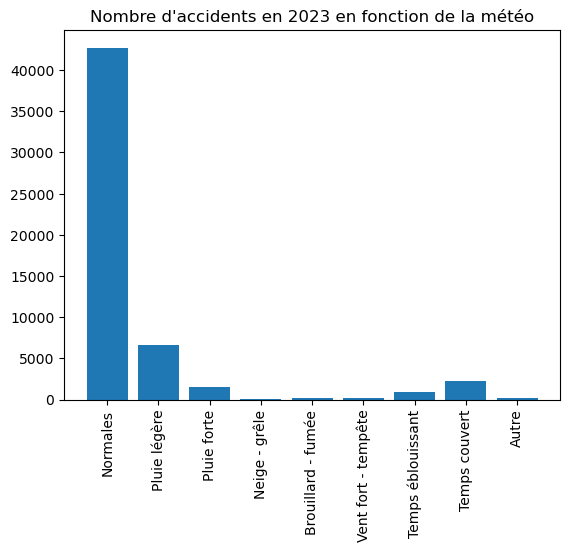

In [ ]:
df_atm = df.groupby("atm").agg({"Num_Acc": "nunique"})
Num_Acc = df_atm["Num_Acc"].tolist()
Num_Acc.pop(0)

hist = { "atm" : ["Normales", "Pluie légère", "Pluie forte", "Neige - grêle", "Brouillard - fumée",
                  "Vent fort - tempête", "Temps éblouissant", "Temps couvert", "Autre"],
        "Num_Acc" : Num_Acc}
plt.bar(hist["atm"], hist["Num_Acc"])
plt.xticks(rotation = 90)
plt.title("Nombre d'accidents en 2023 en fonction de la météo")

Le problème est qu'il faudrait ramener ces données au nombre de jours de pluie, neige, etc par an, sur une certaine région particulière, pour pouvoir vraiment juger de l'impact de la météo sur les accidents.